In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv("boston.csv")
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [5]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])


In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [8]:
X = df.drop(columns=['MEDV'])  
y = df['MEDV']
print(X)
print(y)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD    TAX  \
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666.0   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307.0   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304.0   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666.0   
19    0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307.0   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...    ...   
106   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5  384.0   
270   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290    3  223.0   
348   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440    4  280.0   
435  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   24  666.0   
102   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147    5  384.0   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15      21.0  3

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [12]:
print("lr_model:",lr_model)
print("lr_preds:",lr_preds)


lr_model: LinearRegression()
lr_preds: [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695

In [13]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

In [14]:
print("ridge_model:",ridge_model)
print("ridge_preds:",ridge_preds)

ridge_model: Ridge()
ridge_preds: [28.69407967 35.69624973 14.14604677 24.77692904 19.12179357 22.3570209
 17.58912087 14.21475184 22.12847122 20.77279132 24.17146987 18.4951702
 -6.29301988 21.08523188 19.18913531 26.04536672 20.23858231  5.7053289
 40.43474415 17.91612892 27.43043793 29.92461421 11.38883023 24.60118193
 18.18125052 15.15104154 22.19649828 14.82532248 21.67117438 19.43105782
 21.99246852 25.3686087  25.96176085 18.51300716 16.04760564 18.302591
 31.19087441 20.68246616 23.27364222 24.35686729 14.03522763 32.15944386
 42.51991417 17.00094891 27.15720866 17.16383312 14.12738417 25.64406338
 19.75818552 30.23788203 21.18407291 34.15407049 16.16191481 26.28068194
 39.82193467 22.44553595 19.32982702 32.78839298 24.95168597 12.62342509
 23.02399332 30.93133913 31.65682607 16.37777093 20.64826913 15.79643946
 20.63368747 25.91815943 30.83867541 11.85058587 20.30655214 26.81227907
 11.3751572  16.61165603 23.09530038  6.15927055 21.41361316 41.23537798
 18.6526414   8.081319

In [15]:
print("Linear Regression R²:", r2_score(y_test, lr_preds))
print("Linear Regression MSE:", mean_squared_error(y_test, lr_preds))

print("Ridge Regression R²:", r2_score(y_test, ridge_preds))
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_preds))

Linear Regression R²: 0.6687594935356317
Linear Regression MSE: 24.291119474973538
Ridge Regression R²: 0.6662221670168522
Ridge Regression MSE: 24.47719122770865


In [16]:
features = X.columns
lr_coefs = lr_model.coef_

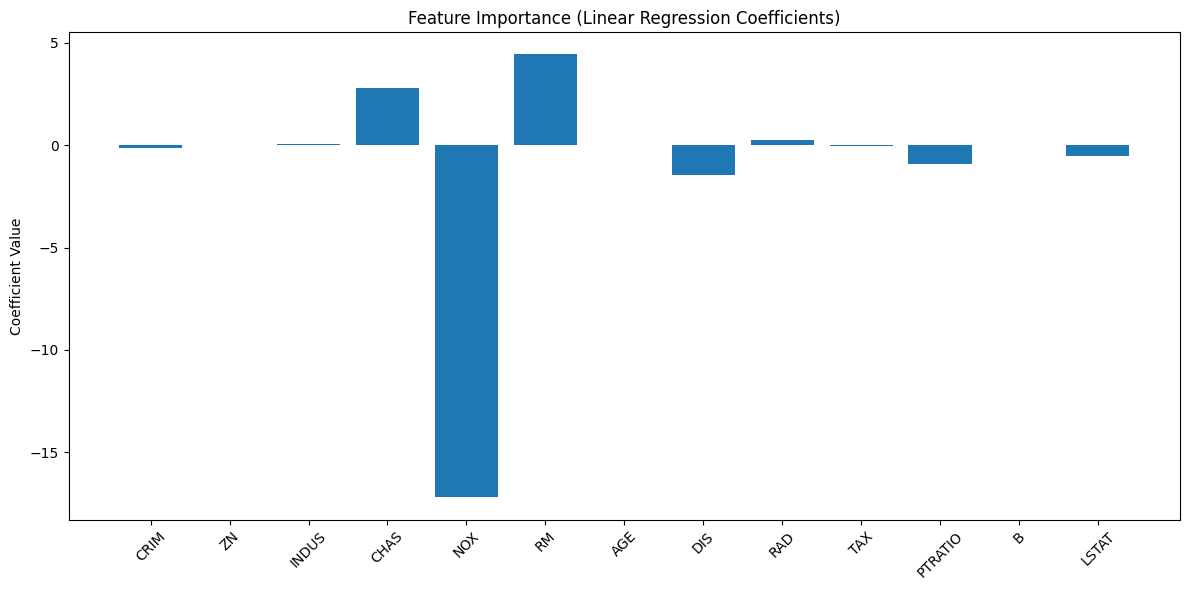

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(features, lr_coefs)
plt.xticks(rotation=45)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()


In [19]:
output_df = pd.DataFrame({
    'Actual': y_test.values,
    'Linear_Predicted': lr_preds,
    'Ridge_Predicted': ridge_preds
})
output_df.to_csv("house_price_predictions.csv", index=False)